In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Changing display
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 127)
pd.set_option('display.max_rows', 100)

#Loading and merging data

In [ ]:
# Loading in data
poi = pd.read_csv('/content/drive/MyDrive/Datasets/hitting biomechanics/poi_metrics.csv')
hittrax = pd.read_csv('/content/drive/MyDrive/Datasets/hitting biomechanics/hittrax.csv')

# Selecting relevant data from hittrax
hittrax_data = hittrax[['session_swing', 'pitch_angle', 'la']]

# Merging data
data = poi.merge(hittrax_data, on='session_swing')

In [ ]:
# Checking how many null entries
data.isnull().sum().sum()

23

In [ ]:
# Dropping null entries
data.dropna(inplace=True)

In [ ]:
data.shape

(581, 129)

In [ ]:
data.head()

,session_swing,session,exit_velo_mph_x,blast_bat_speed_mph_x,bat_speed_mph_contact_x,sweet_spot_velo_mph_contact_x,sweet_spot_velo_mph_contact_y,sweet_spot_velo_mph_contact_z,bat_torso_angle_connection_x,attack_angle_contact_x,bat_speed_mph_max_x,bat_speed_xy_max_x,bat_torso_angle_ds_x,bat_torso_angle_ds_y,bat_torso_angle_ds_z,hand_speed_blast_bat_mph_max_x,hand_speed_mag_max_x,pelvis_angle_fm_x,pelvis_angle_fm_y,pelvis_angle_fm_z,pelvis_angle_fp_x,pelvis_angle_fp_y,pelvis_angle_fp_z,pelvis_angle_hs_x,pelvis_angle_hs_y,pelvis_angle_hs_z,torso_angle_fm_x,torso_angle_fm_y,torso_angle_fm_z,torso_angle_fp_x,torso_angle_fp_y,torso_angle_fp_z,torso_angle_hs_x,torso_angle_hs_y,torso_angle_hs_z,upper_arm_speed_mag_max_x,x_factor_fm_x,x_factor_fm_y,x_factor_fm_z,x_factor_fp_x,x_factor_fp_y,x_factor_fp_z,bat_max_x,bat_min_x,hand_speed_mag_fm_x,hand_speed_mag_fp_x,hand_speed_mag_maxhss_x,hand_speed_mag_seq_max_x,hand_speed_mag_stride_max_velo_x,hand_speed_mag_swing_max_velo_x,lead_knee_launchpos_x,lead_knee_stride_max_x,lead_wrist_fm_x,lead_wrist_swing_max_x,pelvis_angular_velocity_fm_x,pelvis_angular_velocity_fp_x,pelvis_angular_velocity_maxhss_x,pelvis_angular_velocity_seq_max_x,pelvis_angular_velocity_stride_max_x,pelvis_angular_velocity_swing_max_x,pelvis_fm_x,pelvis_fm_y,pelvis_fm_z,...,pelvis_loadedpos_x,pelvis_load_max_x,pelvis_stride_max_x,pelvis_stride_max_y,pelvis_stride_max_z,pelvis_swing_max_x,pelvis_swing_max_y,pelvis_swing_max_z,rear_elbow_fm_x,rear_elbow_fm_z,rear_elbow_launchpos_x,rear_elbow_stride_max_x,rear_elbow_stride_max_z,rear_elbow_swing_max_x,rear_elbow_swing_max_z,rear_hip_launchpos_x,rear_hip_stride_max_x,rear_hip_stride_max_y,rear_hip_stride_max_z,rear_shoulder_launchpos_x,rear_shoulder_stride_max_x,rear_shoulder_stride_max_y,rear_shoulder_stride_max_z,torso_angular_velocity_fm_x,torso_angular_velocity_fp_x,torso_angular_velocity_maxhss_x,torso_angular_velocity_stride_max_x,torso_angular_velocity_seq_max_x,torso_angular_velocity_swing_max_x,torso_fm_x,torso_fm_y,torso_fm_z,torso_launchpos_x,torso_launchpos_y,torso_launchpos_z,torso_loadedpos_x,torso_load_max_x,torso_pelvis_fm_x,torso_pelvis_launchpos_x,torso_pelvis_loadedpos_x,torso_pelvis_load_max_x,torso_pelvis_stride_max_x,torso_pelvis_stride_max_y,torso_pelvis_stride_max_z,torso_pelvis_swing_max_x,torso_stride_max_x,torso_stride_max_y,torso_stride_max_z,torso_swing_max_x,torso_swing_max_y,torso_swing_max_z,upper_arm_speed_mag_fm_x,upper_arm_speed_mag_fp_x,upper_arm_speed_mag_maxhss_x,upper_arm_speed_mag_seq_max_x,upper_arm_speed_mag_stride_max_velo_x,upper_arm_speed_mag_swing_max_velo_x,x_factor_hs_x,x_factor_hs_y,x_factor_hs_z,max_cog_velo_x,pitch_angle,la
0,103_1,103,97.2,66.8,67.9426,67.5411,1.1177,6.4040,121.0109,5.7984,69.2154,2529.2776,-121.3557,121.0109,101.5540,23.0841,1527.4279,26.7272,3.9890,-20.0787,28.8512,4.1585,13.4340,27.0634,4.7819,-21.0498,27.9432,-15.0864,-13.0060,21.8904,-0.0221,-5.8966,28.8937,-15.0236,-12.1180,987.9657,-0.0808,-20.1757,-2.4765,6.7230,5.7071,-18.9520,597.5685,32.7952,100.3058,529.3574,848.9559,1527.4279,529.3574,1527.4279,31.6650,100.3434,23.0732,-12.3100,31.8693,580.7448,733.0911,733.6451,580.7448,733.6451,-26.7272,3.9890,-110.0787,...,-100.4105,-98.1193,-28.8512,10.6588,-111.1967,-1.8499,10.6588,11.3636,132.2291,67.3961,121.7515,143.6237,77.7509,143.6237,83.4073,54.4718,57.1879,-4.2861,37.7659,51.7001,11.0415,89.5564,11.7063,-20.5107,453.0682,748.4769,453.0682,775.7749,775.7749,-27.9432,-15.0864,-103.0060,-21.8904,-0.0221,-95.8966,-97.7734,-97.5618,-2.4765,-18.9520,-4.3548,-4.9252,-3.1422,-25.0935,-18.9520,-20.5898,-29.9237,-15.0887,-104.0084,19.9394,25.5588,6.2796,77.2077,281.0329,449.7435,987.9657,290.3699,987.9657,-0.7814,-21.6590,-1.2444,1.2410,-7.0,5
1,103_2,103,88.8,65.0,66.0435,65.8729,-3.0676,0.6329,124.9791,0.2952,66.0435,2446.7554,-119.2728,124.9791,103.9509,21.8076,1534.3438,26.9757,5.0393,-20.8640,28.1628,5.7143,12.9408,26.7024,5.7583,-21.4558,31.1782,-15.3465,-10.6443,23.2800,3.3841,-2.5743,31.5994,-15.401

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 603
Data columns (total 129 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    session_swing                          object 
 1    session                                int64  
 2    exit_velo_mph_x                        float64
 3    blast_bat_speed_mph_x                  float64
 4    bat_speed_mph_contact_x                float64
 5    sweet_spot_velo_mph_contact_x          float64
 6    sweet_spot_velo_mph_contact_y          float64
 7    sweet_spot_velo_mph_contact_z          float64
 8    bat_torso_angle_connection_x           float64
 9    attack_angle_contact_x                 float64
 10   bat_speed_mph_max_x                    float64
 11   bat_speed_xy_max_x                     float64
 12   bat_torso_angle_ds_x                   float64
 13   bat_torso_angle_ds_y                   float64
 14   bat_torso_angle_ds_z                   f

#Making angle difference variable

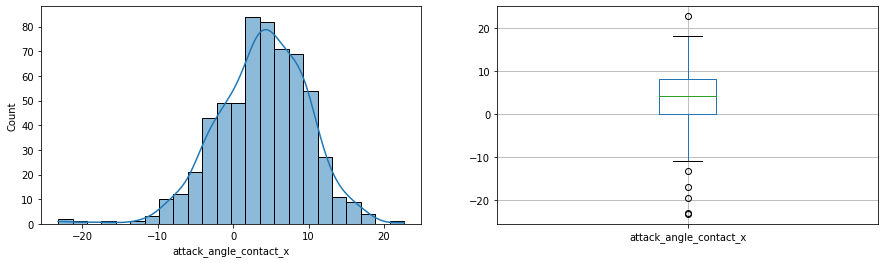

In [ ]:
# Visualizing attack angle distribution
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
sns.histplot(data['attack_angle_contact_x'], ax=ax1, kde=True, legend=False)
data.boxplot(column=['attack_angle_contact_x'], ax=ax2)
plt.show()

In [ ]:
# Creating inverse of attack angle
data['attack_angle_inverse'] = data['attack_angle_contact_x'] * -1

# Creating angle difference variable by measuring difference between the attack and pitch angle
data['angle_difference'] = data['attack_angle_inverse'] - data['pitch_angle']

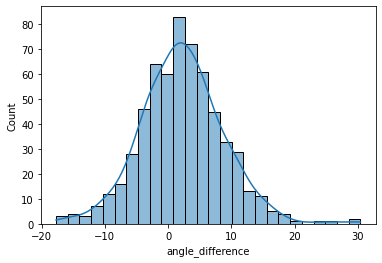

In [ ]:
# Visualizing angle difference distribution
sns.histplot(data['angle_difference'], kde=True, legend=False)
plt.show()

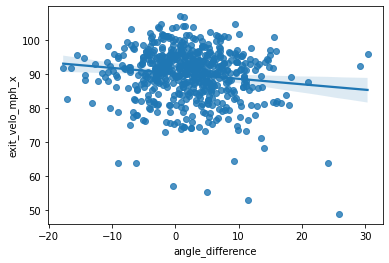

In [ ]:
# Visualizing relationship between angle difference and exit velo
sns.regplot(data=data, x='angle_difference', y='exit_velo_mph_x')

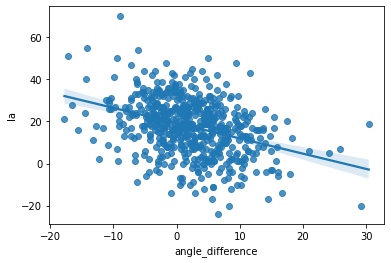

In [ ]:
# Visualizing relationship between angle difference and launch angle
sns.regplot(data=data, x='angle_difference', y='la')

In [ ]:
# Examining features most correlated with launch angle, angle difference more correlated than any other!
la_corr = abs(data.corr()).sort_values(by='la', ascending=False)
la_corr.iloc[0].sort_values(ascending=False).head()

la                               1.000000
angle_difference                 0.356845
sweet_spot_velo_mph_contact_z    0.332744
attack_angle_contact_x           0.317770
attack_angle_inverse             0.317770
Name: la, dtype: float64

#Exit Velo

##EDA and Data Cleaning

In [ ]:
# Generating list of features in order of highest correlation with exit velocity
corr_ev = abs(data.corr()).sort_values(by='exit_velo_mph_x', ascending=False)

# Reducing feature set to 50 highest correlations with exit velo
ev_cols = corr_ev.iloc[0].sort_values(ascending=False).head(50).axes[0].to_list()

# New exit velo dataset with the reduced feature set
ev_data = data[ev_cols]

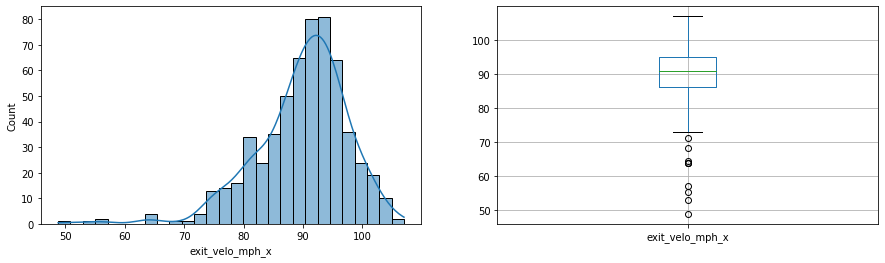

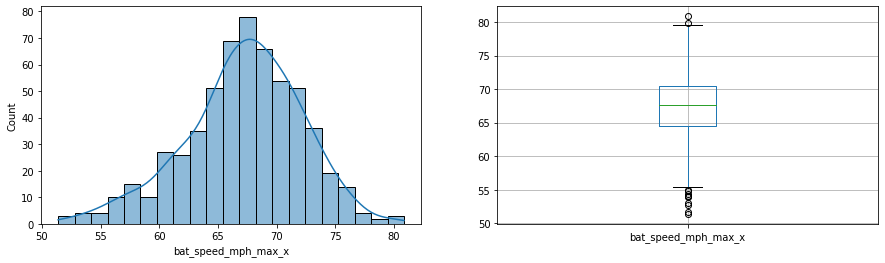

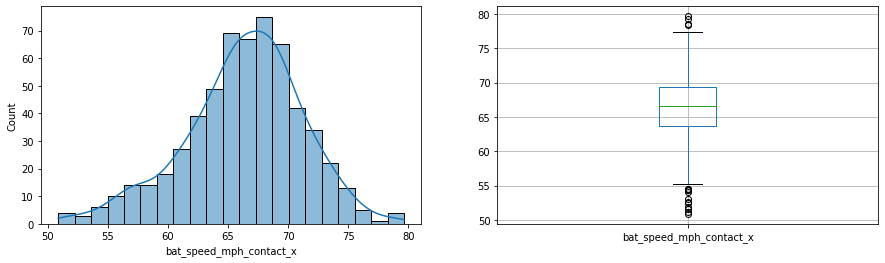

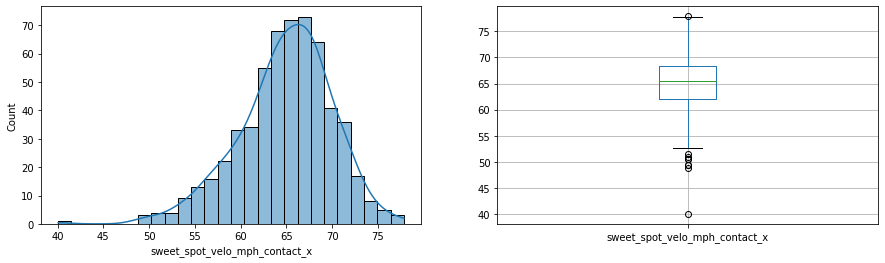

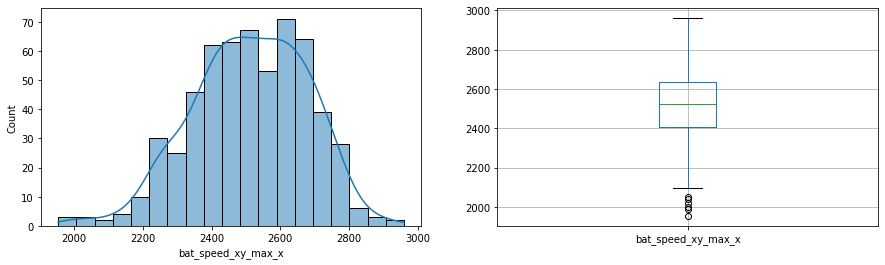

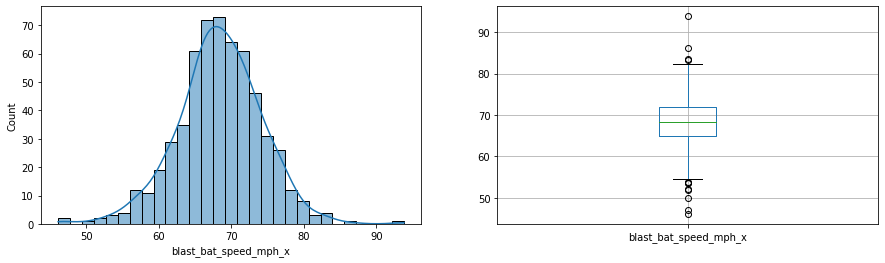

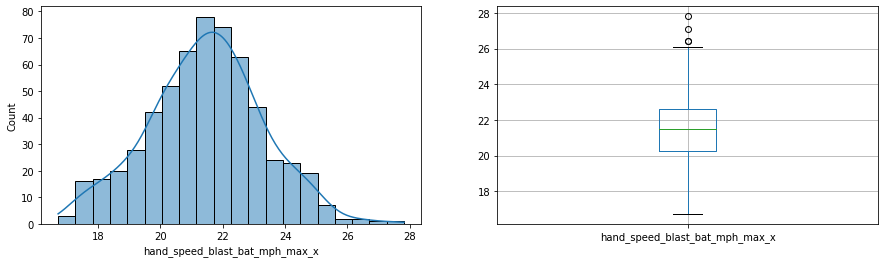

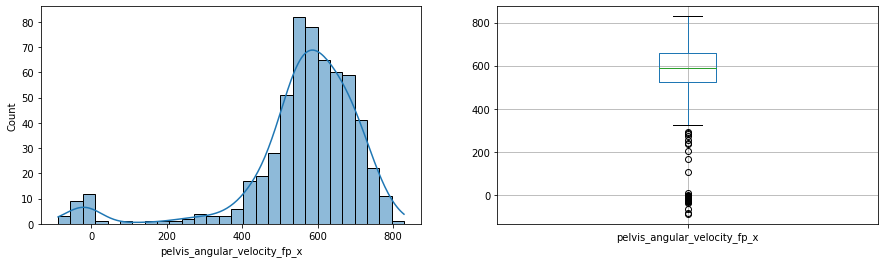

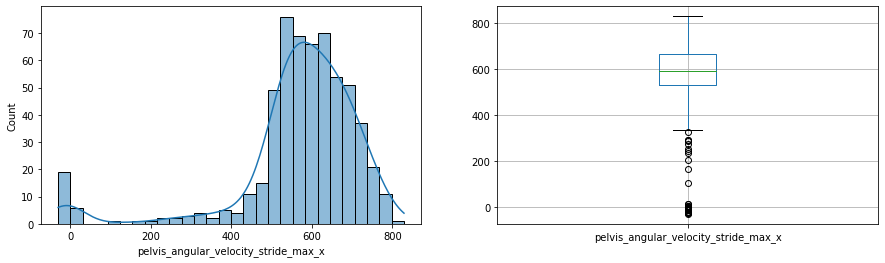

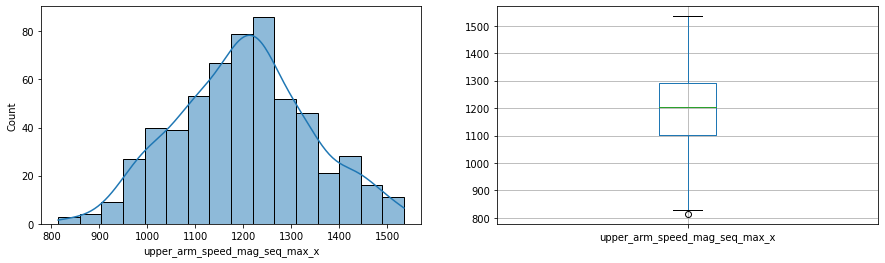

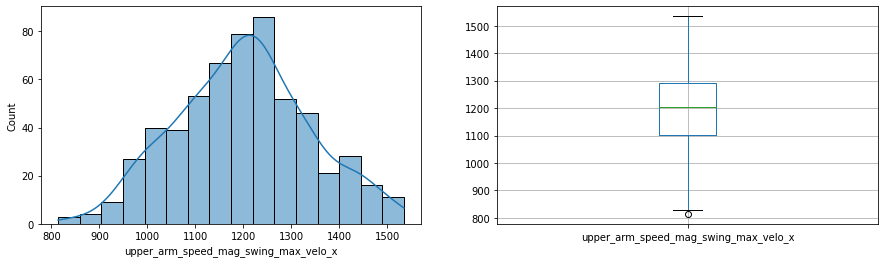

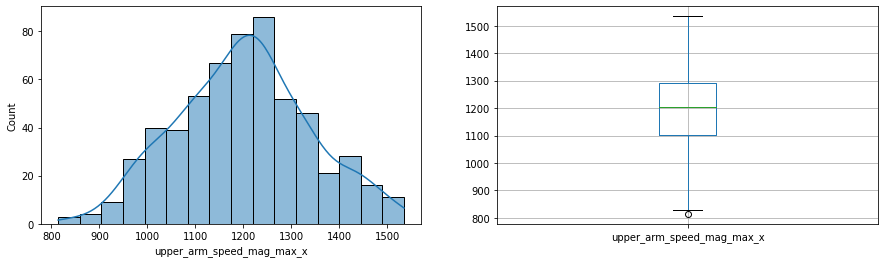

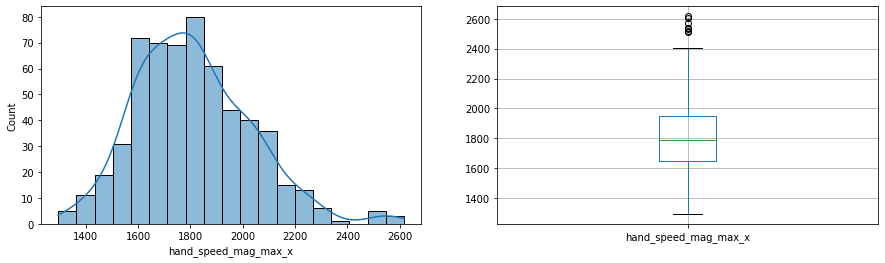

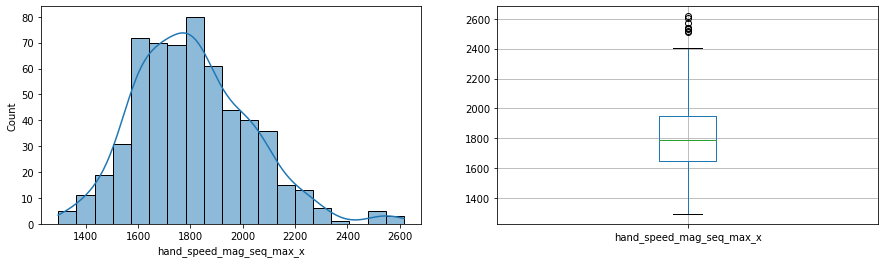

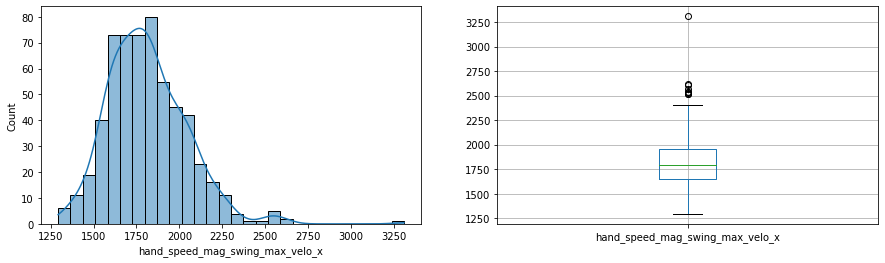

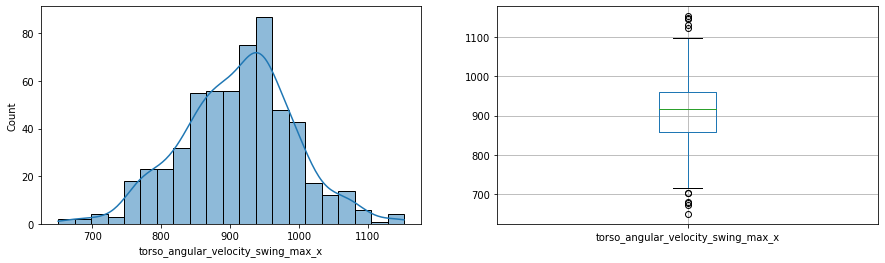

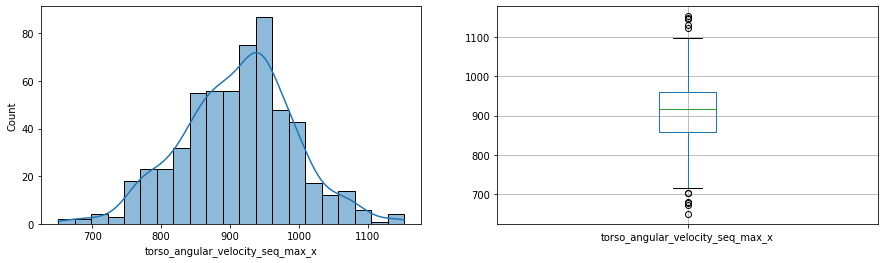

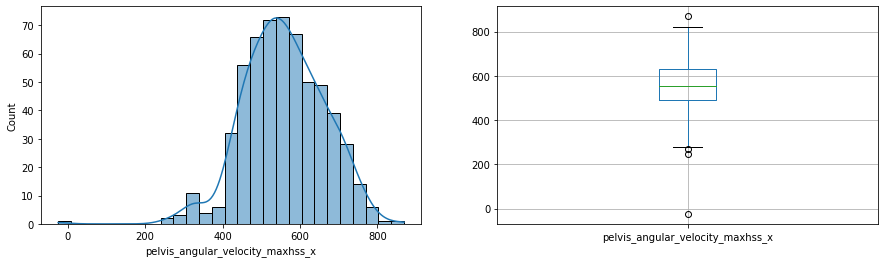

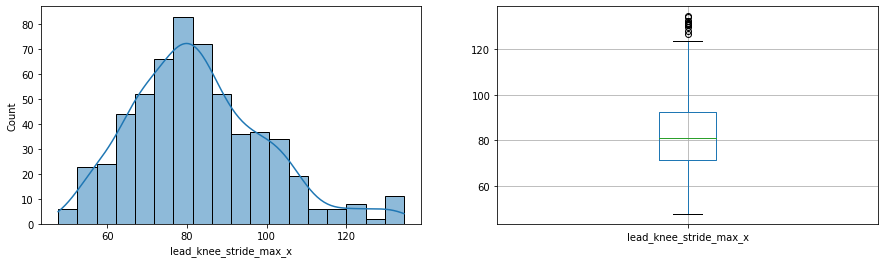

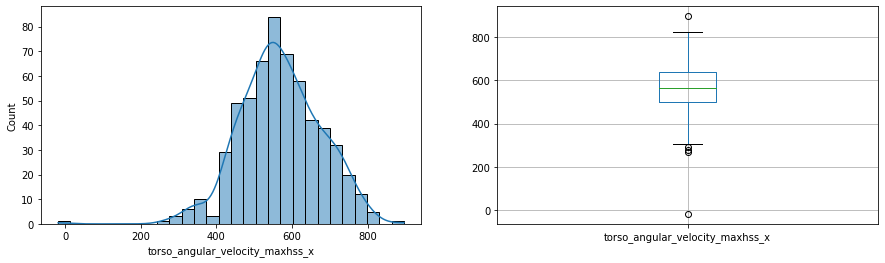

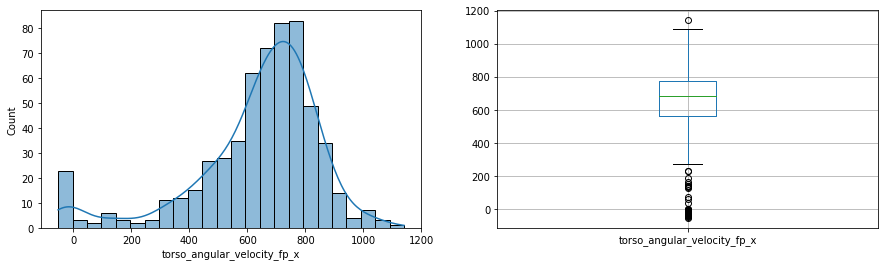

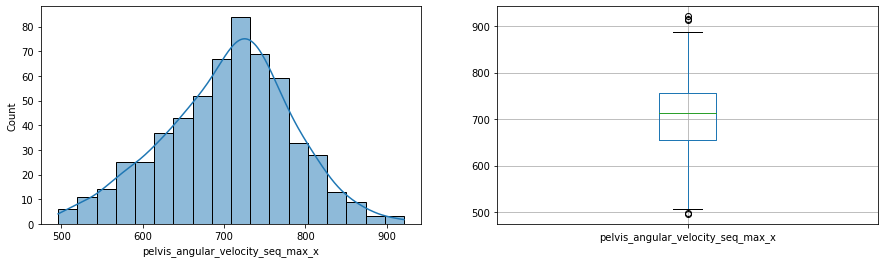

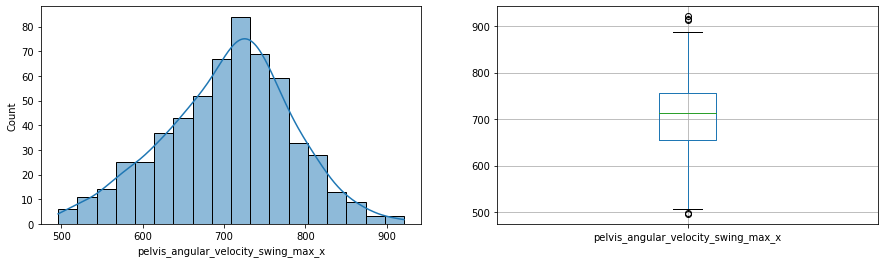

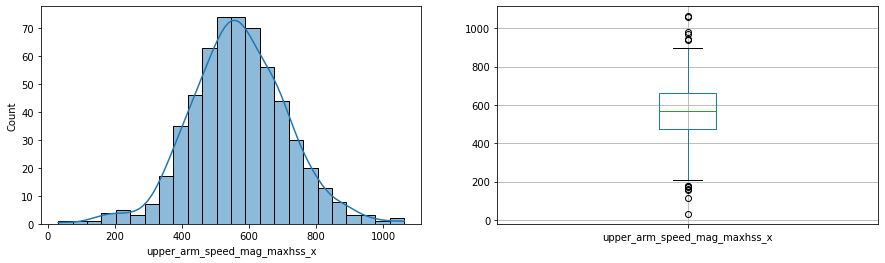

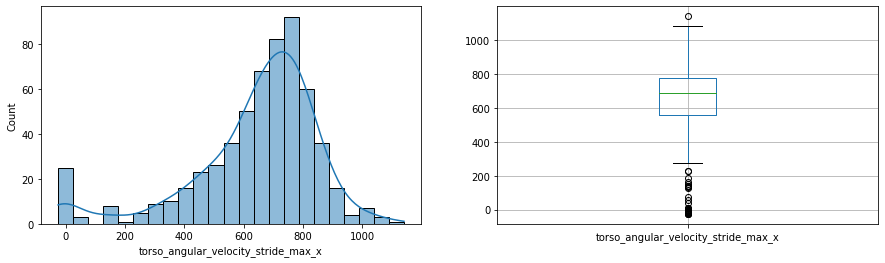

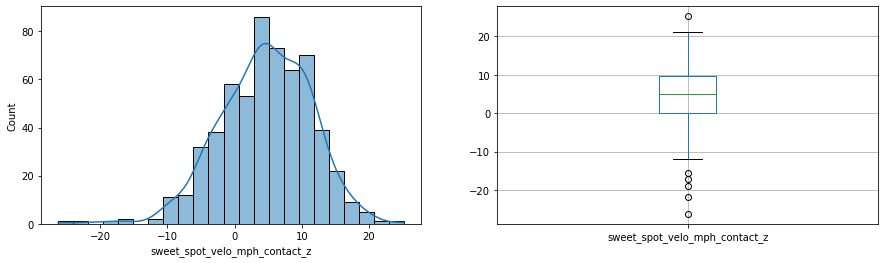

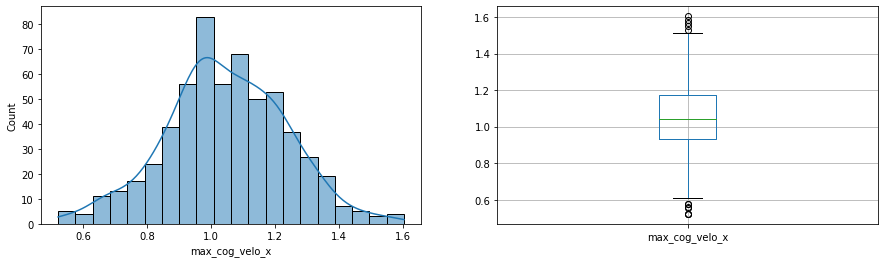

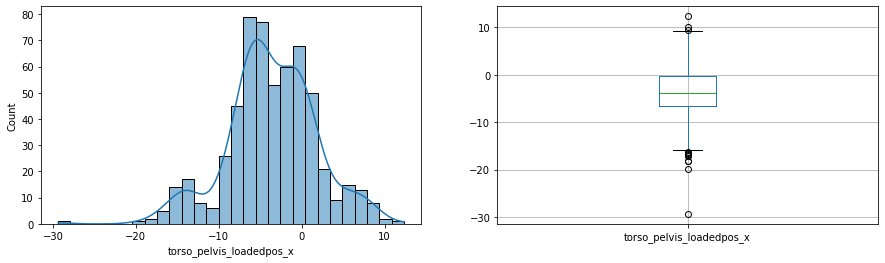

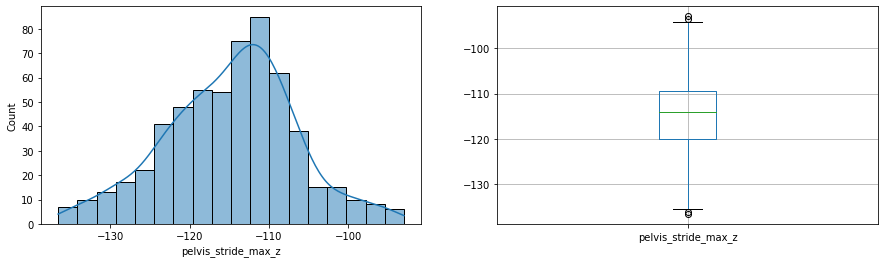

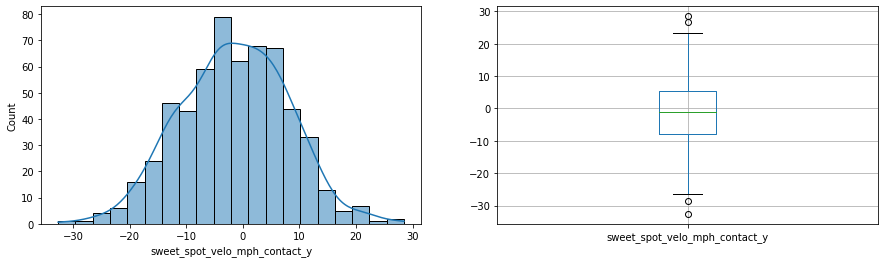

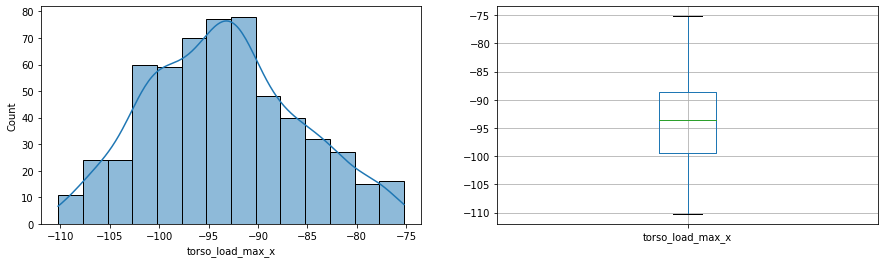

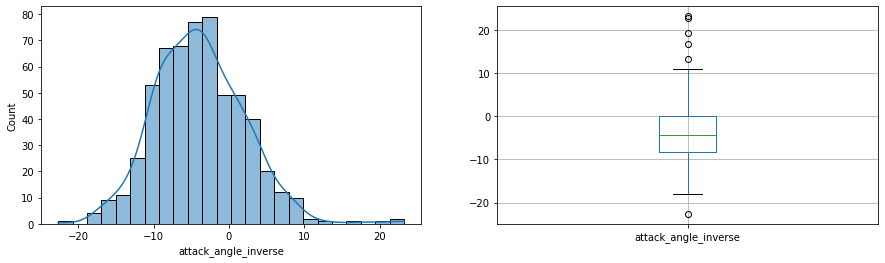

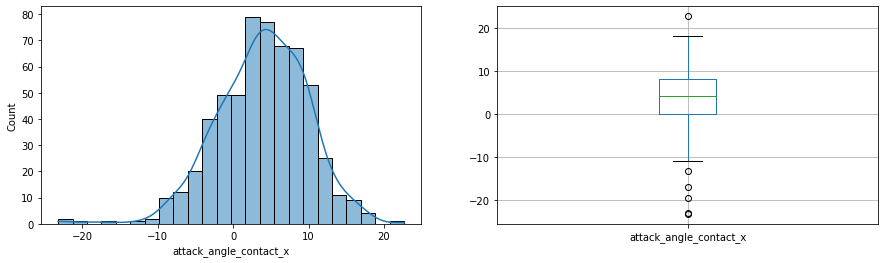

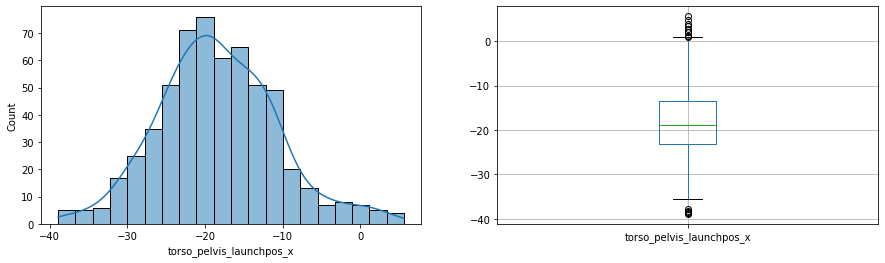

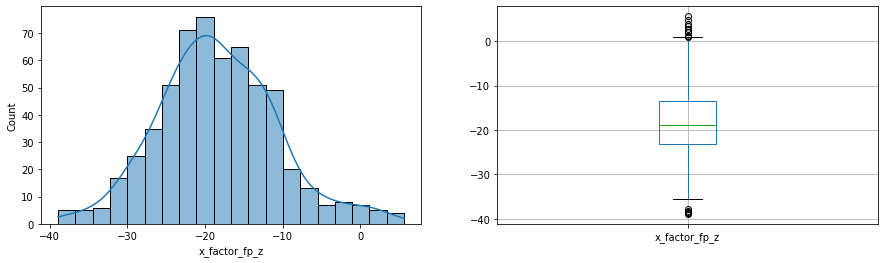

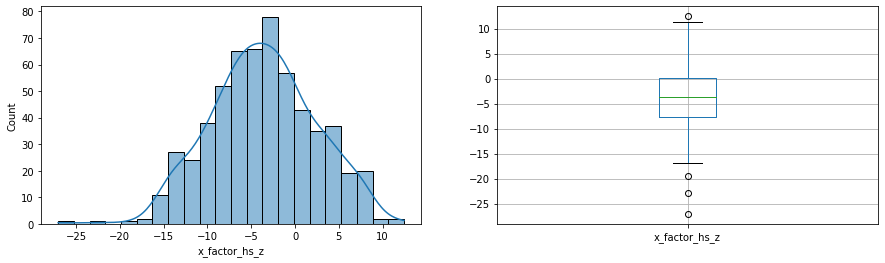

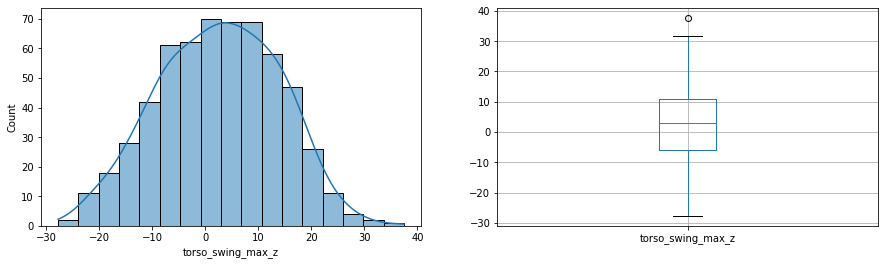

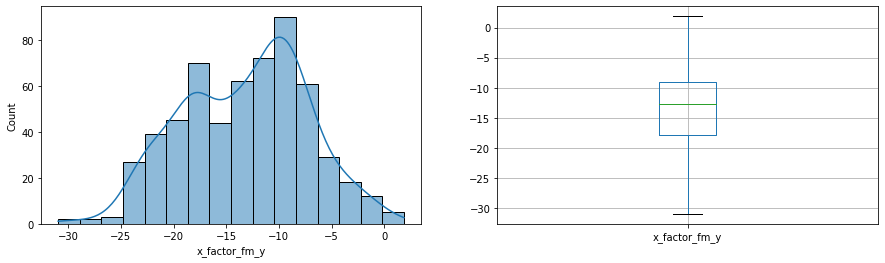

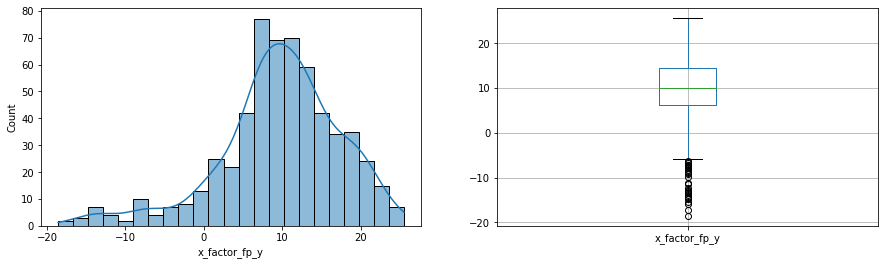

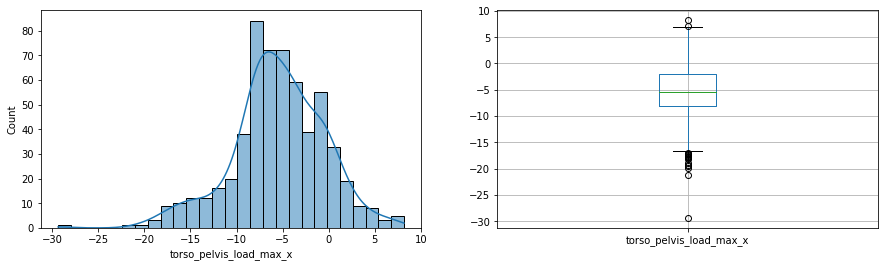

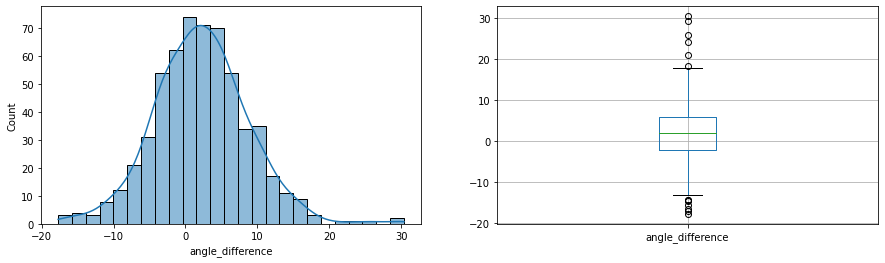

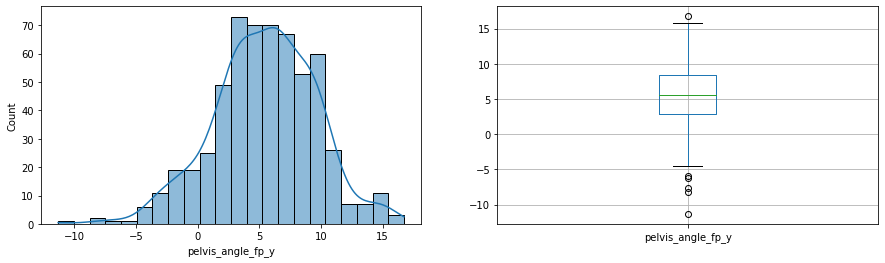

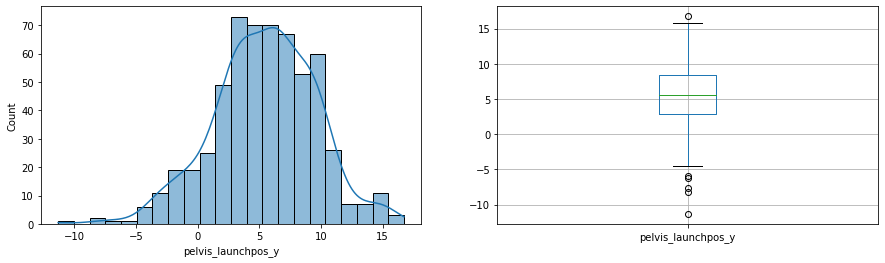

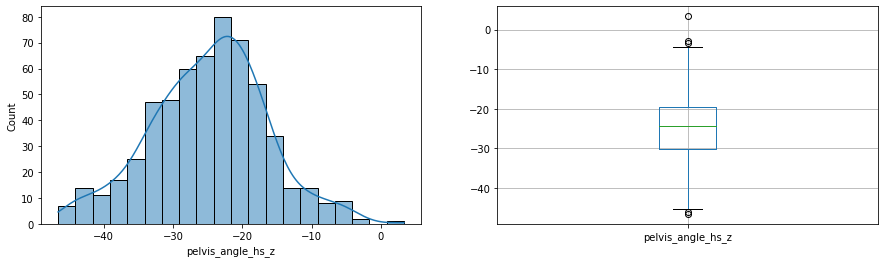

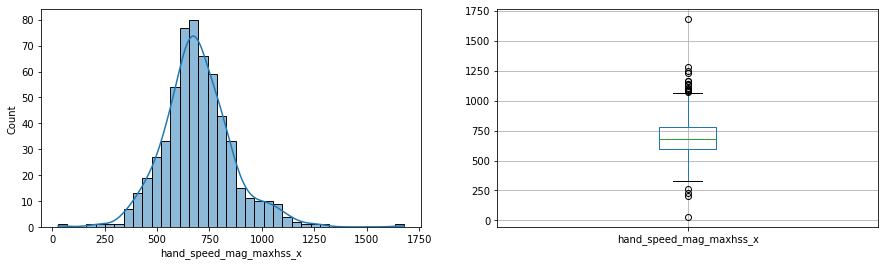

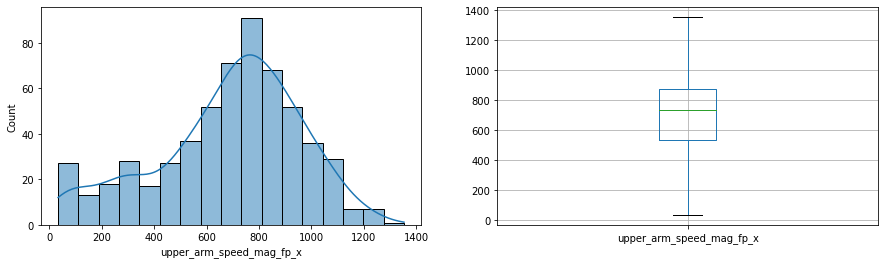

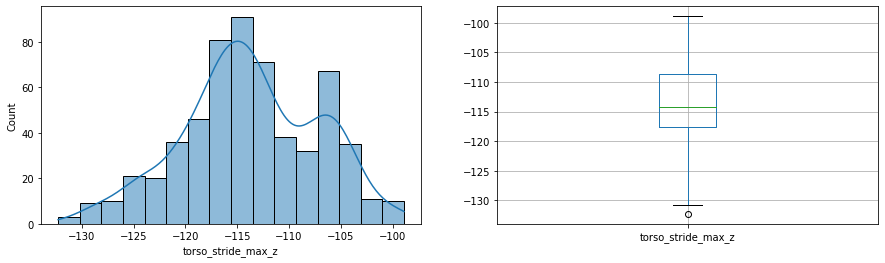

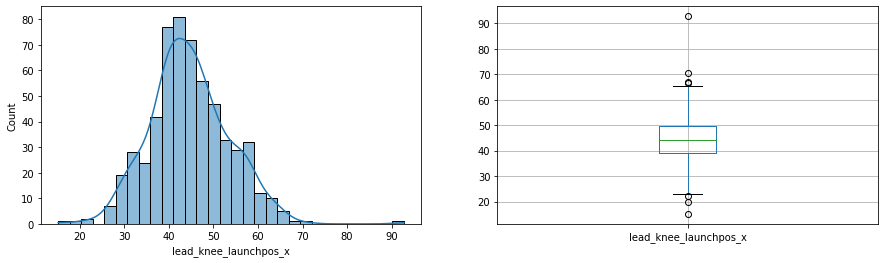

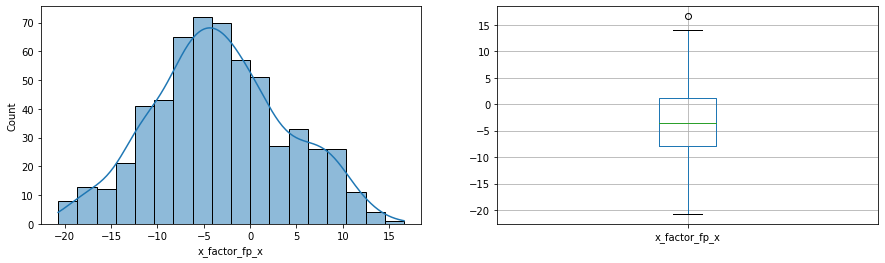

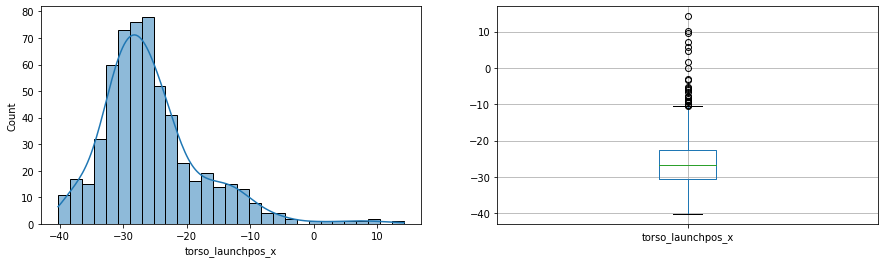

In [ ]:
# Examining distributions for each feature
for x in ev_data.columns:
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))
  # Histogram
  sns.histplot(ev_data[x], ax=ax1, kde=True, legend=False)
  # Box plot
  ev_data.boxplot(column=[x], ax=ax2)
  plt.show()

In [ ]:
## Removing outliers from the exit velo distribution

# Getting original amount of observations
original_rows = ev_data.shape[0]

# Getting inner quartile range
Q1 = ev_data['exit_velo_mph_x'].quantile(0.25)
Q3 = ev_data['exit_velo_mph_x'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers from the exit velo dataset
ev_data = ev_data[~((ev_data['exit_velo_mph_x'] < (Q1 - 1.5 * IQR)) |(ev_data['exit_velo_mph_x'] > (Q3 + 1.5 * IQR)))]

# Creating another dataset with only the outliers that were removed
outlier_data = data[((data['exit_velo_mph_x'] < (Q1 - 1.5 * IQR)) |(data['exit_velo_mph_x'] > (Q3 + 1.5 * IQR)))]

# Seeing how many outliers were removed
outliers_removed = original_rows - ev_data.shape[0]
print("Outliers removed: ", outliers_removed)

Outliers removed:  10


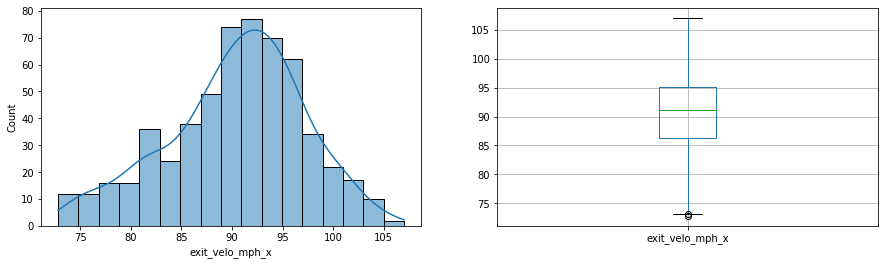

In [ ]:
# Visualizing distribution of exit velos after removing outliers
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))

# Histogram
sns.histplot(ev_data['exit_velo_mph_x'], ax=ax1, kde=True, legend=False)
# Box plot
ev_data.boxplot(column=['exit_velo_mph_x'], ax=ax2)

In [ ]:
# Summary stats of dataset
ev_data.describe()

,exit_velo_mph_x,bat_speed_mph_max_x,bat_speed_mph_contact_x,sweet_spot_velo_mph_contact_x,bat_speed_xy_max_x,blast_bat_speed_mph_x,hand_speed_blast_bat_mph_max_x,pelvis_angular_velocity_fp_x,pelvis_angular_velocity_stride_max_x,upper_arm_speed_mag_seq_max_x,upper_arm_speed_mag_swing_max_velo_x,upper_arm_speed_mag_max_x,hand_speed_mag_max_x,hand_speed_mag_seq_max_x,hand_speed_mag_swing_max_velo_x,torso_angular_velocity_swing_max_x,torso_angular_velocity_seq_max_x,pelvis_angular_velocity_maxhss_x,lead_knee_stride_max_x,torso_angular_velocity_maxhss_x,torso_angular_velocity_fp_x,pelvis_angular_velocity_seq_max_x,pelvis_angular_velocity_swing_max_x,upper_arm_speed_mag_maxhss_x,torso_angular_velocity_stride_max_x,sweet_spot_velo_mph_contact_z,max_cog_velo_x,torso_pelvis_loadedpos_x,pelvis_stride_max_z,sweet_spot_velo_mph_contact_y,torso_load_max_x,attack_angle_inverse,attack_angle_contact_x,torso_pelvis_launchpos_x,x_factor_fp_z,x_factor_hs_z,torso_swing_max_z,x_factor_fm_y,x_factor_fp_y,torso_pelvis_load_max_x,angle_difference,pelvis_angle_fp_y,pelvis_launchpos_y,pelvis_angle_hs_z,hand_speed_mag_maxhss_x,upper_arm_speed_mag_fp_x,torso_stride_max_z,lead_knee_launchpos_x,x_factor_fp_x,torso_launchpos_x
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.00000,571.000000,571.000000,571.000000,571.000000
mean,90.368827,67.283561,66.399074,65.037924,2515.960633,68.413135,21.470793,569.126389,576.275287,1202.488688,1202.488688,1202.488688,1813.940688,1813.940688,1816.550677,913.543961,913.543961,558.995314,83.300894,569.704217,645.190829,706.389405,706.389405,569.701873,646.889082,4.725411,1.046879,-3.591898,-114.995437,-1.491804,-93.508427,-4.019350,4.019350,-18.535979,-18.535979,-3.587981,2.632984,-13.230818,9.751492,-5.473119,2.083102,5.426732,5.426732,-24.971865,696.177065,691.17938,-113.957247,44.625417,-3.388734,-25.667103
std,6.784819,4.925120,4.854787,5.041398,163.492131,5.843700,1.844779,150.604247,147.676213,138.522560,138.522560,138.522560,220.230837,220.230837,228.935373,80.278069,80.278069,104.728841,16.595350,106.906119,208.041439,77.486042,77.486042,143.273622,207.519360,6.625446,0.190054,5.439643,8.102083,9.530508,7.604106,5.842438,5.842438,7.580094,7.580094,5.972411,11.411295,5.970909,7.619715,5.060771,6.393260,4.135200,4.135200,8.255197,167.898024,268.73914,6.469126,8.870216,7.172369,7.704358
min,72.800000,51.386300,50.859600,40.063500,1954.008200,46.100000,16.721800,-88.031900,-30.512600,814.212600,814.212600,814.212600,1293.911000,1293.911000,1293.911000,650.304700,650.304700,-24.542200,50.340800,-18.656100,-53.049000,496.189500,496.189500,31.264400,-25.305300,-26.281000,0.522500,-29.372700,-136.565800,-32.614600,-110.228200,-22.649200,-23.195800,-38.919600,-38.919600,-27.049600,-27.733800,-30.952000,-18.591300,-29.372700,-17.720600,-11.324500,-11.324500,-46.565800,29.004600,33.12640,-132.297900,15.114900,-20.721000,-40.261800
25%,86.300000,64.678000,63.656100,62.174800,2409.599100,65.100000,20.289000,524.721250,534.183600,1105.246950,1105.246950,1105.246950,1653.286300,1653.286300,1653.286300,861.140500,861.140500,490.176950,71.970100,501.766650,568.780450,658.941600,658.941600,475.425550,568.780450,0.222050,0.936900,-6.521450,-120.165250,-7.913350,-99.363400,-8.234700,0.088000,-23.389750,-23.389750,-7.530600,-5.784000,-17.954450,6.372250,-8.035100,-2.145350,2.941100,2.941100,-30.236550,592.527350,541.87885,-117.703050,38.966750,-8.004750,-30.585800
50%,91.200000,67.741200,66.758800,65.584200,2524.128900,68.400000,21.536600,590.646100,594.561000,1205.926600,1205.926600,1

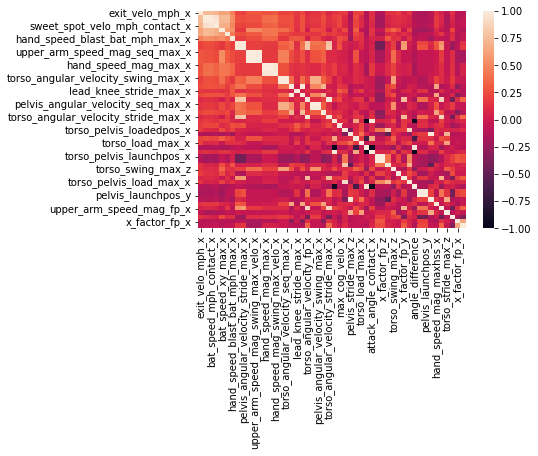

In [ ]:
# Correlation heatmap of dataset
sns.heatmap(ev_data.corr())

In [ ]:
# Examining shape
ev_data.shape

(571, 50)

In [ ]:
## Creating feature set that removes some redundant information and reduces features even further by removing features that have correlations greater than 0.5 with another, code obtained from
## https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

# Creating a copy of dataset
less_cols = ev_data.copy()

# Create correlation matrix
corr_matrix = less_cols.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features
less_cols.drop(to_drop, axis=1, inplace=True)

<ipython-input-32-7a5693e2675c>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
# Examining new shape
less_cols.shape

(571, 16)

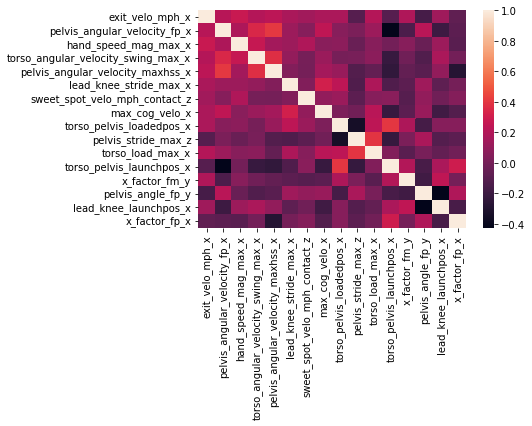

In [ ]:
# Correlation heatmap of reduced features
sns.heatmap(less_cols.corr())

In [ ]:
# Generating list of new features
less_cols_list = less_cols.columns.to_list()

# Removing target variable
less_cols_list.remove('exit_velo_mph_x')
less_cols_list

# Removing target variable from bigger feature set as well
ev_cols.remove('exit_velo_mph_x')

##Baseline Model

In [ ]:
# Creating baseline dummy regressor model
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")

# Fitting and predicting
dummy_regr.fit(ev_data[ev_cols], ev_data['exit_velo_mph_x'])
dummy_preds = dummy_regr.predict(ev_data[ev_cols])

In [ ]:
# Evaluating baseline model

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_true = ev_data['exit_velo_mph_x'], y_pred = dummy_preds)
print("Dummy RMSE:", rmse)

Dummy RMSE: 60.569224643842155


##Initial Models

In [ ]:
# Importing packages for predictions
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score

In [ ]:
# Evaluating Random Forest model
rf_ev_initial = RandomForestRegressor()

# Evaulating predictions from smaller feature set
print("Fewer cols:", cross_val_score(rf_ev_initial, ev_data[less_cols_list], ev_data['exit_velo_mph_x'], cv=5,
                                       scoring='neg_root_mean_squared_error').mean())
# Evaluating predictions from larger feature set
print("More cols:", cross_val_score(rf_ev_initial, ev_data[ev_cols], ev_data['exit_velo_mph_x'], cv=5,
                                       scoring='neg_root_mean_squared_error').mean())

Fewer cols: -6.6309965462948695
More cols: -4.620810688552487


In [ ]:
# Evaluating XGBoost model
xgb_ev_initial = XGBRegressor()

# Evaluating predictions from smaller feature set
print("Fewer cols:", cross_val_score(xgb_ev_initial, ev_data[less_cols_list], ev_data['exit_velo_mph_x'], cv=5,
                                       scoring='neg_root_mean_squared_error').mean())
# Evaluating predictions from larger feature set
print("More cols:", cross_val_score(xgb_ev_initial, ev_data[ev_cols], ev_data['exit_velo_mph_x'], cv=5,
                                       scoring='neg_root_mean_squared_error').mean())

[02:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fewer cols: -6.783172174677159
[02:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear i

In [ ]:
# Evaulating Linear Regression model
lr_ev_initial = LinearRegression()

# Evaluating predictions from smaler feature set (didn't use larger feature set because of multicollinearity)
print(cross_val_score(lr_ev_initial, ev_data[less_cols_list], ev_data['exit_velo_mph_x'], cv=5, scoring = 'neg_root_mean_squared_error').mean())

-6.455746760863269


##Tuning RF

In [ ]:
# Importing grid searches for tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## Tuning Random Forest model

# Initializing model
rf = RandomForestRegressor()

# Creating parameter grid
param_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, None],
 'max_features': [2, 5, 10, 20, 'auto', 'sqrt'],
 'min_samples_leaf': [2, 5, 10, 20],
 'min_samples_split': [2, 5, 10, 20],
 'n_estimators': [50, 100, 200, 500, 1000, 1500, 2000]
}

# Creating randomized grid search
rnd_rf = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 300, cv = 3, verbose = True, n_jobs = -1)
# Fitting grid search
rnd_rf.fit(ev_data[ev_cols], ev_data['exit_velo_mph_x'])

# Printing randomized grid search best parameters
print(rnd_rf.best_params_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 20, 'max_depth': 10, 'bootstrap': True}


In [ ]:
# Creating new parameter grid from randomized grid search results
param_grid = {
 'bootstrap': [True],
 'max_depth': [4, 8, 12],
 'max_features': [20, 30, 50],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [4, 5, 7],
 'n_estimators': [75, 100, 125]
}

# Creating grid search
grid_rf = GridSearchCV(rf, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = -1)
# Fitting grid search
grid_rf.fit(ev_data[ev_cols], ev_data['exit_velo_mph_x'])

# Printing grid search best parameters
print(grid_rf.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

{'bootstrap': True, 'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 75}


In [ ]:
# Creating Random Forest model with tuned hyperparameters
rf = RandomForestRegressor(bootstrap=True, max_depth=12, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=75)

# Evaulating tuned Random Forest Model
print("RMSE:", cross_val_score(rf, ev_data[ev_cols], ev_data['exit_velo_mph_x'], cv=5,
                                       scoring='neg_root_mean_squared_error').mean())

RMSE: -4.514880638908375


##Generating Predictions

In [ ]:
# Importing package for predicting
from sklearn.model_selection import cross_val_predict

In [ ]:
# Generating predictions
preds = cross_val_predict(rf, ev_data[ev_cols], ev_data['exit_velo_mph_x'], cv=5)

# Concatenating predictions to dataset
preds = pd.Series(preds, index = ev_data.index)
ev_data['predicted_ev'] = preds

In [ ]:
## Generating predictions for the outlier exit velocity sample

# Creating same feature set of exit velocity dataset for the outlier dataset
outlier_cols = ev_data.columns.to_list()
outlier_cols.remove('predicted_ev')

# Setting outlier dataset to only contain features
outlier_data = outlier_data[outlier_cols]

# Fitting Random Forest model to the non-outlier data
rf.fit(ev_data[ev_cols], ev_data['exit_velo_mph_x'])

# Predicting the outlier exit velocities
outlier_preds = rf.predict(outlier_data[ev_cols])

# Concatenating predictions to the outlier dataset
outlier_preds = pd.Series(outlier_preds, index=outlier_data.index)
outlier_data['predicted_ev'] = outlier_preds

# Concatenating the exit velocity and outlier datasets
ev_data = pd.concat([ev_data, outlier_data])

##Evaluating Model

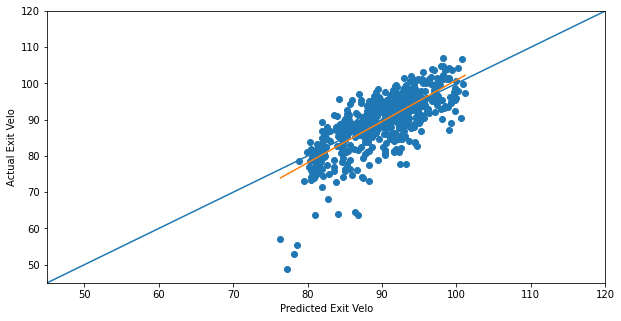

In [ ]:
## Plotting predictions against the actual exit velocities
f, ax = plt.subplots(figsize=(10, 5))

# Scatter plot
ax.scatter(ev_data['predicted_ev'], ev_data['exit_velo_mph_x'])

# Setting labels
plt.ylabel("Actual Exit Velo")
plt.xlabel("Predicted Exit Velo")

# Setting view
plt.ylim([45, 120])
plt.xlim([45, 120])

# Plotting line of identity
ax.plot([0, 1], [0, 1], transform=ax.transAxes)

# Plotting line of best fit
plt.plot(np.unique(ev_data['predicted_ev']), np.poly1d(np.polyfit(ev_data['predicted_ev'],
                                                                  ev_data['exit_velo_mph_x'], 1))(np.unique(ev_data['predicted_ev'])))

plt.show()

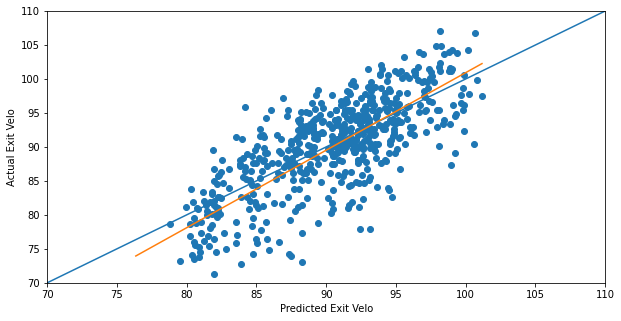

In [ ]:
## Scatter plot of predictions against actual more focused on data the model was trained on

f, ax = plt.subplots(figsize=(10, 5))

# Scatter plot
ax.scatter(ev_data['predicted_ev'], ev_data['exit_velo_mph_x'])

# Setting labels
plt.ylabel("Actual Exit Velo")
plt.xlabel("Predicted Exit Velo")

# More focused on exit velocities model was trained on
plt.ylim([70, 110])
plt.xlim([70, 110])

# Plotting line of identity
ax.plot([0, 1], [0, 1], transform=ax.transAxes)

# Plotting line of best fit
plt.plot(np.unique(ev_data['predicted_ev']), np.poly1d(np.polyfit(ev_data['predicted_ev'],
                                                                  ev_data['exit_velo_mph_x'], 1))(np.unique(ev_data['predicted_ev'])))

plt.show()

In [ ]:
# Summary statistics of actual exit velocities against predicted
ev_data[['exit_velo_mph_x', 'predicted_ev']].describe()

,exit_velo_mph_x,predicted_ev
count,581.000000,581.000000
mean,89.862651,90.301678
std,7.789330,5.035262
min,48.800000,76.351973
25%,86.100000,87.128025
50%,91.000000,91.036756
75%,95.000000,93.680917
max,107.000000,101.167313


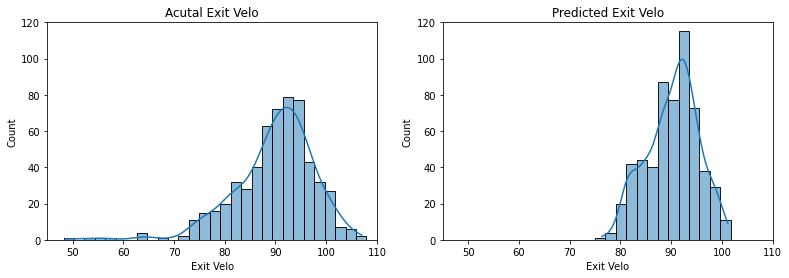

In [ ]:
# Distributions of actual and predicted exit velocities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))

# Plotting histograms
bins = np.linspace(40, 110, 35)
sns.histplot(ev_data['exit_velo_mph_x'], ax=ax1, kde=True, legend=False, bins=bins)
sns.histplot(ev_data['predicted_ev'], ax=ax2, kde=True, legend=False, bins=bins)

# Changing view
ax1.set_xlim(left=45, right=110)
ax2.set_xlim(left=45, right=110)
ax1.set_ylim(bottom=0, top=120)
ax2.set_ylim(bottom=0, top=120)

# Setting labels
ax1.set_title('Acutal Exit Velo')
ax2.set_title('Predicted Exit Velo')
ax1.set_xlabel('Exit Velo')
ax2.set_xlabel('Exit Velo')

plt.show()

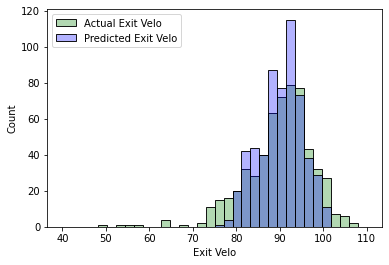

In [ ]:
# Plotting the distributions overlayed
bins = np.linspace(40, 110, 35)

# Actual distribution
sns.histplot(ev_data['exit_velo_mph_x'], color='g', bins=bins, alpha=0.3, label="Actual Exit Velo")

# Predicted distribution
sns.histplot(ev_data['predicted_ev'], color = 'b', bins=bins, alpha=0.3, label='Predicted Exit Velo')

# Creating labels
plt.legend()
plt.xlabel('Exit Velo')

plt.show()

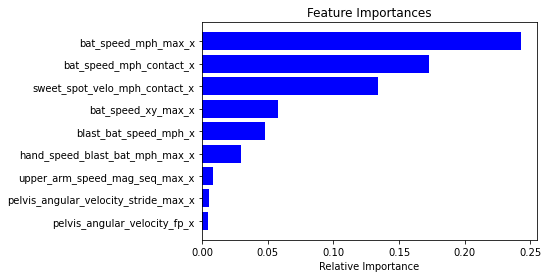

In [ ]:
## Generating feature importances

# Getting the 9 most importance features
features = ev_cols[:9]
importances = rf.feature_importances_[:9]
# Sorting features by importance level
indices = np.argsort(importances)

# Plotting the feature importances
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])

# Creating labels
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

plt.show()